<a href="https://colab.research.google.com/github/t-sasatani/wpt-analysis/blob/main/examples/measurement_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os

if 'COLAB_GPU' in os.environ:
    !pip install git+https://github.com/t-sasatani/wpt-analysis

In [15]:
from wpt_tools import analysis

### Create instance of analysis and set initial variables

In [16]:
wpt_eval_ins = analysis.nw_tools()
rx_port = 1 # 1 or 2

### Import 2-port network data

In [17]:
mode = 'file'

if mode == 'file':
    wpt_eval_ins.import_touchstone('./assets/sample.s2p')

2024-07-11 00:26:41,733 : INFO : analysis.py - Loaded touchstone file: ./assets/sample.s2p


### Plot Z-parameters (full-range)

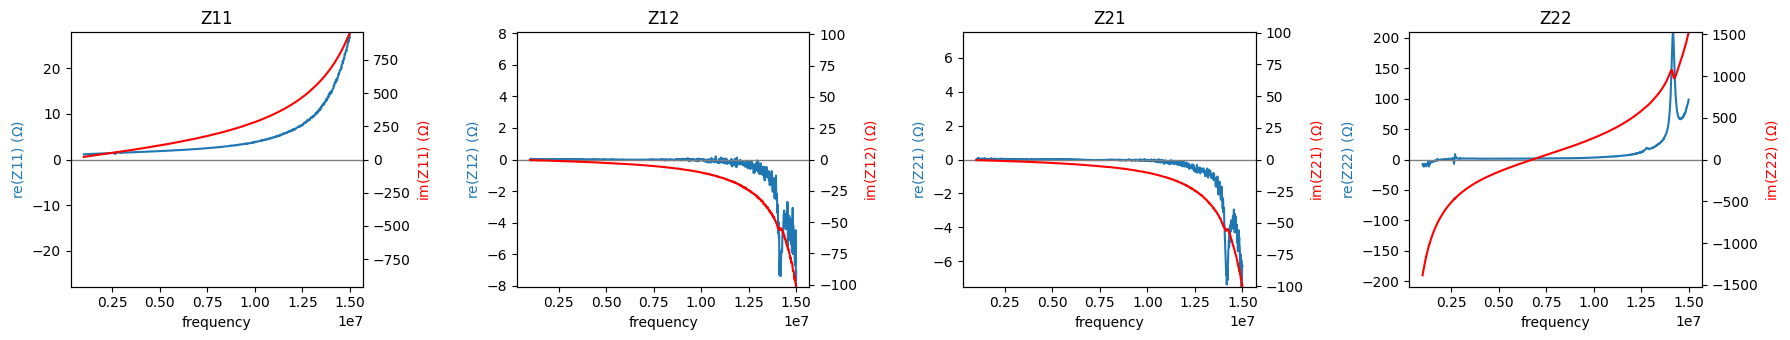

In [18]:
wpt_eval_ins.plot_z_full()

### Efficiency and optimal load analysis (for general 2-port networks)
This becomes unstable when the analysis frequency is far from the resonant frequency.
This is probably because to S to Z conversion becomes unstable.

In [19]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
f_opt, eff_opt, r_opt, x_opt = wpt_eval_ins.efficiency_load_analysis(show_plot=1, rx_port=rx_port)

2024-07-11 00:26:45,509 : INFO : analysis.py - Target frequency: 7.272e+06
2024-07-11 00:26:45,510 : INFO : analysis.py - Maximum efficiency: 0.45
2024-07-11 00:26:45,510 : INFO : analysis.py - Optimum Re(Zload): 6.39
2024-07-11 00:26:45,510 : INFO : analysis.py - Optimum Im(Zload): -170.13


### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

2024-07-11 00:26:45,600 : INFO : analysis.py - R2 for fitting Ls2, Cs2: 0.999822
2024-07-11 00:26:45,646 : INFO : analysis.py - Self impedance at target frequency

2024-07-11 00:26:45,677 : INFO : analysis.py - Re(Z11): 2.27e+00
Im(Z11): 1.55e+02

2024-07-11 00:26:45,705 : INFO : analysis.py - Re(Z22): 1.58e+00
Im(Z22) -3.21e-01

2024-07-11 00:26:45,705 : INFO : analysis.py - Fitting values assuming a pair of series LCR resonators

2024-07-11 00:26:45,706 : INFO : analysis.py - Ls1: 4.22e-06, Cs1: 9.48e-10, Rs1: 2.27e+00, f_1: 2.516e+06, Q_1 (approximate, @6.780e+06 Hz): 7.92e+01
2024-07-11 00:26:45,706 : INFO : analysis.py - Ls2: 6.02e-06, Cs2: 9.15e-11, Rs2: 1.58e+00, f_2: 6.782e+06, Q_2 (approximate, @6.780e+06 Hz): 1.62e+02
2024-07-11 00:26:45,706 : INFO : analysis.py - Lm: -1.02e-07, km: -0.020


(4.21940077959137e-06,
 9.481653690093794e-10,
 array([2.27027173]),
 6.0202547240629255e-06,
 9.147605994929213e-11,
 array([1.57843751]),
 array([-1.02031277e-07]))

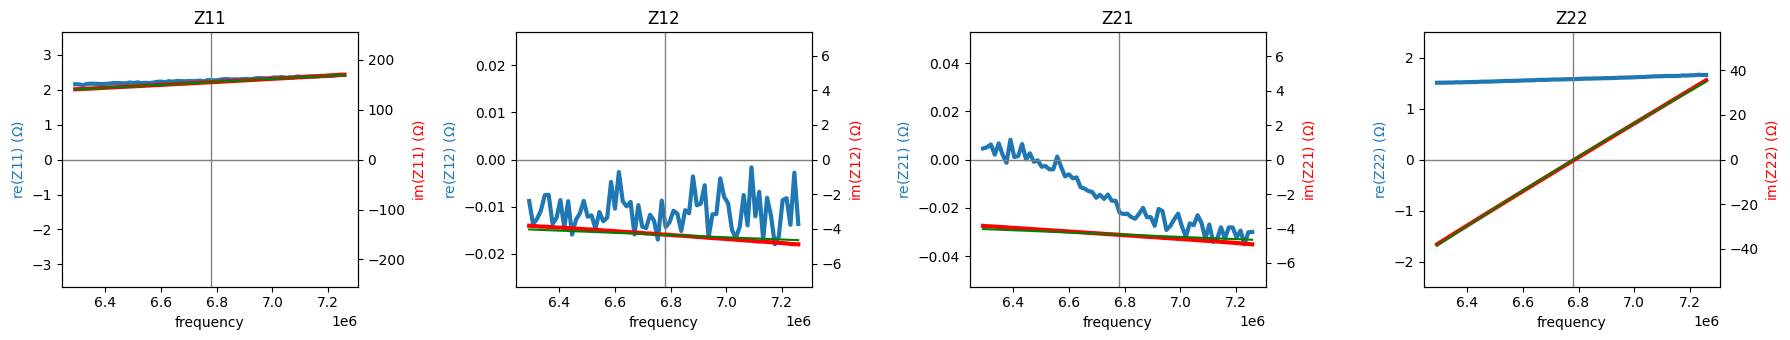

In [20]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.plot_z_narrow_fit()

### Optimal load visualization

2024-07-11 00:26:47,446 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x0000021F61E11BD0>
2024-07-11 00:26:47,741 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x0000021F61E11850>
2024-07-11 00:26:48,027 : DEBUG : colorbar.py - locator: <matplotlib.ticker.AutoLocator object at 0x0000021F5B5AFFD0>


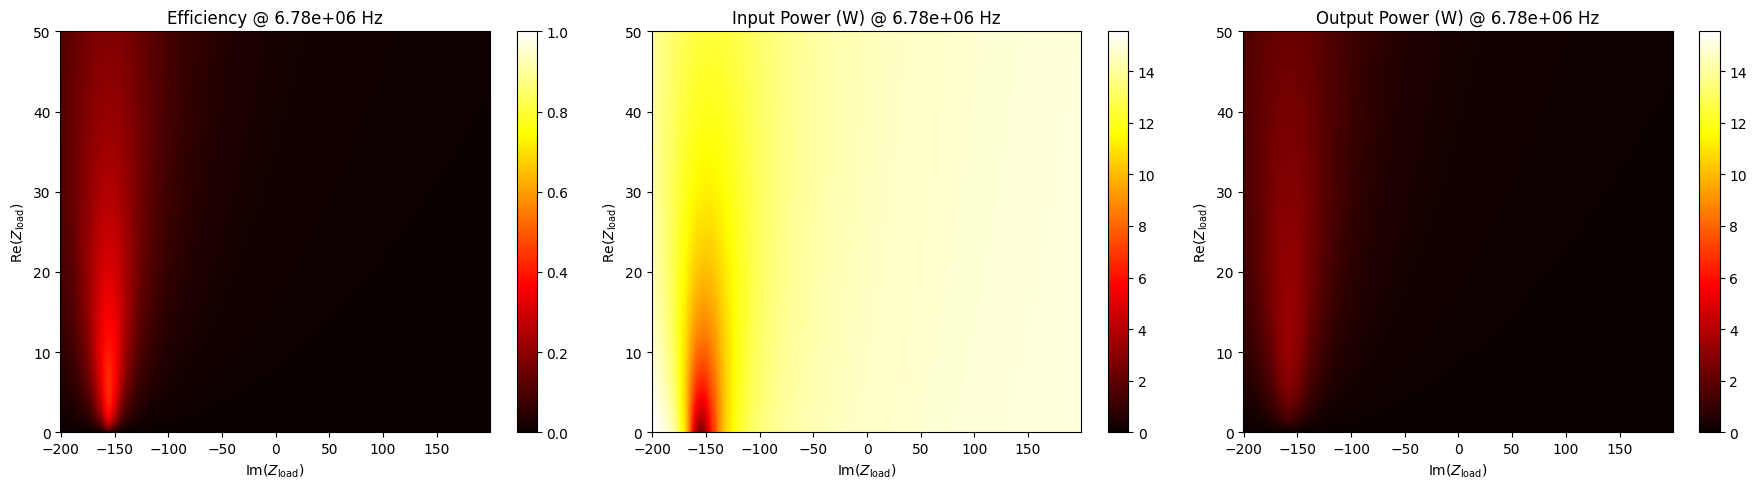

In [21]:
wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=50, step_rez=0.2,\
    min_imz=-200, max_imz=200, step_imz=1, input_voltage=5, rx_port=rx_port)

### Capacitor filter calculator
![](https://github.com/t-sasatani/wpt-analysis/blob/main/examples/img/CpCsRltopology.png?raw=1)

In [22]:
wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.rxc_filter_calc(rx_port = rx_port, rload = 100, c_network = 'CpCsRl')

2024-07-11 00:26:51,779 : INFO : analysis.py - Target frequency: 7.272e+06
2024-07-11 00:26:51,780 : INFO : analysis.py - Maximum efficiency: 0.45
2024-07-11 00:26:51,780 : INFO : analysis.py - Receiver inductance: 4.22e-06
2024-07-11 00:26:51,781 : INFO : analysis.py - Optimum load: 6.39
2024-07-11 00:26:51,781 : INFO : analysis.py - Target Rload: 100.00

2024-07-11 00:26:51,785 : INFO : analysis.py - [8.49553872e-11 2.89396275e-11]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 82
         Function evaluations: 158
